# Deep Learning week - Day 1 - Multiclass classification

### Exercise Objectives:
- Write a Neural Network for multiclass classification
- Observe overfitting during the model convergence

<hr>
<hr>

You just defined and run your first neural network for a two-class classification problem. What if there are more than two classes? This notebook is a multiclass classification task : based on the input data $x$, tells whether the sample belongs to the first, second, third, ... category.

# Create the data


The `make_blob` function [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) enables to draw : 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

There is also the `random_state` argument that allows to draw the data deterministically, in order to reproduce the same data. Two persons that choose the same random_state will have the same data.

❓ **Question** ❓ Based on the documentation, generate data with : 
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

Select a `random_state` equal to 1.

Print the shape and check that it corresponds to (1200, 8) for `X` and (1200) for `y`


In [1]:
from sklearn.datasets import make_blobs

blobs = make_blobs(n_samples=1200, n_features=8, centers=7, cluster_std=8.0, random_state = 1)

In [2]:
import pandas as pd
df = pd.DataFrame({'target' : blobs[1]})
X =  pd.DataFrame(blobs[0])

In [3]:
df = pd.merge(df, X, left_index = True, right_index = True,)

In [4]:
df.head(1)

,target,0,1,2,3,4,5,6,7
0,2,-9.983452,-6.813585,-1.803034,6.505192,9.449461,11.453562,2.507279,17.188678


❓ **Question** ❓ Thanks to matplotlib, plot two (arbitrary) dimensions of the input data. Each dot should be colored by the category it belongs to.

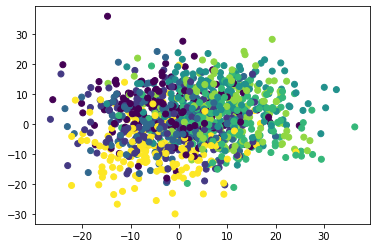

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df[0], df[1], c = df['target'])

❓ **Question** ❓ Repeat the operation on other dimensions, to visualy that the data are not easily separable

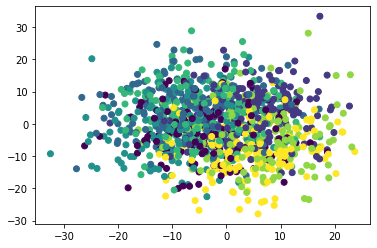

In [6]:
plt.scatter(df[3], df[7], c = df['target'])

As for now, `y` is the list of integers, each correspoding to the category of the related input data.
It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

However, for categorical task in Keras, the output should have a number of columns equal to the number of different categories. Each row, corresponding to an input data, is a list of the probabilities that this input belongs to the corresponding category. AS here, the probabilities to belong to each category is equal to 1, it should look like

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

Each column corresponds to a category. Each row corresponds to a target, the 1 being the category the input data belongs to.

To transform `y` to categories, use `to_categorical` function from Keras . 


❓ **Question** ❓ First print `y`, then apply it and store it into `y_cat` and reprint `y_cat` to see the new structure.

In [7]:
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(df['target'])
y_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

❓ **Question** ❓ Split the dataset $X$ and $y_cat$  into a train and test set (size: 70/30%)

Remark : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(blobs[0], y_cat, test_size = 0.3)

For technical reasons, the data should be rescaled, so that the data are _approximately_ all in [-1, 1].
To do so, the `StandardScaler` function from Scikit-Learn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) allows to do that easily.

[Advanced notion] The technical reason for this rescaling will be seen during the week ;)

The function should be applied as 
```
SScaler = StandardScaler()
SScaler.fit(X)             ### Used to fit the coefficients of the standardisation
X = SScaler.transform(X)   ### Used to rescale X
```

❓ **Question** ❓ Given that you splited you dataset into `X_train` and `X_test`, how would you perform this task? 

In [9]:
from sklearn.preprocessing import StandardScaler
SScaler = StandardScaler()
SScaler.fit(X_train)
X_train = SScaler.transform(X_train)
X_test = SScaler.transform(X_test)

❓ **Question** ❓ Complete the following function to initialize a model that has 
- a first layer with 50 neurons (activation being `relu` and appropriate input dimension)
- a output layer designed for a multiclassification task which outputs probabilities for each class

Hint: the last layer will look like : `model.add(layers.Dense(SOME_NUMBER, activation='softmax'))`

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
def initialize_model():
    
    # Model architecture
    model = models.Sequential()
    model.add(layers.Dense(50, input_dim = 8, activation='relu'))
    model.add(layers.Dense(7, activation='softmax'))
    
    # Model optimization : Optimizer, loss and metric 
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model 

### Note here that the loss is different! This is because the task is not with two categories only, therefore
### the solver is somehow different (will see it tomorrow)

model = initialize_model()

❓ **Question** ❓ How many parameters (a.k.a. weights) are there in the model? How many a logistic regression would have had with the same data?

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                450       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 357       
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


❓ **Question** ❓ Fit your model onto the train data with 50 epochs and plot the history

In [13]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=16, 
                    verbose=0)

In [14]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

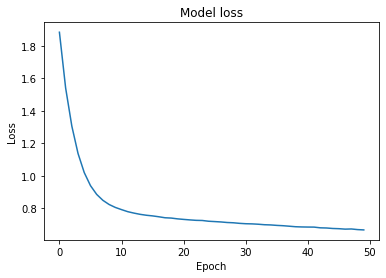

In [15]:
plot_history(history)

❓ **Question** ❓ Evaluate your model on the test set and print the accuracy

In [16]:
results = model.evaluate(X_test, y_test)
print(results)

12/12 [==============================] - 0s 2ms/step - loss: 0.8927 - accuracy: 0.6722
[0.8927412033081055, 0.6722221970558167]


❓ **Question** ❓ Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give?

a random result would be a true classification rate of 0.12.

❗ **Remark** ❗ Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stopping it so soon? Let's rerun the model (with the initialization first) with 2000 epochs and plot the history

In [17]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    epochs=2000, 
                    batch_size=16)

Epoch 1/2000
53/53 [==============================] - 0s 1ms/step - loss: 1.8340 - accuracy: 0.2607
Epoch 2/2000
53/53 [==============================] - 0s 2ms/step - loss: 1.5189 - accuracy: 0.5274
Epoch 3/2000
53/53 [==============================] - 0s 2ms/step - loss: 1.2891 - accuracy: 0.6345
Epoch 4/2000
53/53 [==============================] - 0s 2ms/step - loss: 1.1218 - accuracy: 0.6798
Epoch 5/2000
53/53 [==============================] - 0s 2ms/step - loss: 1.0055 - accuracy: 0.6964
Epoch 6/2000
53/53 [==============================] - 0s 2ms/step - loss: 0.9278 - accuracy: 0.7048
Epoch 7/2000
53/53 [==============================] - 0s 2ms/step - loss: 0.8752 - accuracy: 0.7048
Epoch 8/2000
53/53 [==============================] - 0s 2ms/step - loss: 0.8406 - accuracy: 0.7179
Epoch 9/2000
53/53 [==============================] - 0s 2ms/step - loss: 0.8165 - accuracy: 0.7202
Epoch 10/2000
53/53 [==============================] - 0s 2ms/step - loss: 0.7992 - accuracy: 0.7202

53/53 [==============================] - 0s 1ms/step - loss: 0.5471 - accuracy: 0.8000
Epoch 162/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.5458 - accuracy: 0.8000
Epoch 163/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.5456 - accuracy: 0.8024
Epoch 164/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.5444 - accuracy: 0.8012
Epoch 165/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.7988
Epoch 166/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.5447 - accuracy: 0.8060
Epoch 167/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.7988
Epoch 168/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.8036
Epoch 169/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.5419 - accuracy: 0.8036
Epoch 170/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.5424 - accuracy: 0.

53/53 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.8452
Epoch 322/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.8393
Epoch 323/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.8393
Epoch 324/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.4605 - accuracy: 0.8345
Epoch 325/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.8369
Epoch 326/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.8405
Epoch 327/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8429
Epoch 328/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.8476
Epoch 329/2000
53/53 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8429
Epoch 330/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.

53/53 [==============================] - 0s 1ms/step - loss: 0.3954 - accuracy: 0.8607
Epoch 482/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.3954 - accuracy: 0.8595
Epoch 483/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.8607
Epoch 484/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8560
Epoch 485/2000
53/53 [==============================] - 0s 934us/step - loss: 0.3976 - accuracy: 0.8560
Epoch 486/2000
53/53 [==============================] - 0s 919us/step - loss: 0.3949 - accuracy: 0.8571
Epoch 487/2000
53/53 [==============================] - 0s 903us/step - loss: 0.3946 - accuracy: 0.8583
Epoch 488/2000
53/53 [==============================] - 0s 942us/step - loss: 0.3925 - accuracy: 0.8583
Epoch 489/2000
53/53 [==============================] - 0s 942us/step - loss: 0.3935 - accuracy: 0.8560
Epoch 490/2000
53/53 [==============================] - 0s 990us/step - loss: 0.3933 - 

53/53 [==============================] - 0s 986us/step - loss: 0.3688 - accuracy: 0.8643
Epoch 562/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.3673 - accuracy: 0.8655
Epoch 563/2000
53/53 [==============================] - 0s 889us/step - loss: 0.3659 - accuracy: 0.8667
Epoch 564/2000
53/53 [==============================] - 0s 965us/step - loss: 0.3636 - accuracy: 0.8726
Epoch 565/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.8679
Epoch 566/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8714
Epoch 567/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8667
Epoch 568/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.8667
Epoch 569/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.8702
Epoch 570/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.3651 - accura

53/53 [==============================] - 0s 939us/step - loss: 0.3130 - accuracy: 0.8869
Epoch 722/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 0.8893
Epoch 723/2000
53/53 [==============================] - 0s 938us/step - loss: 0.3125 - accuracy: 0.8893
Epoch 724/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.3127 - accuracy: 0.8881
Epoch 725/2000
53/53 [==============================] - 0s 938us/step - loss: 0.3121 - accuracy: 0.8869
Epoch 726/2000
53/53 [==============================] - 0s 920us/step - loss: 0.3134 - accuracy: 0.8893
Epoch 727/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.3129 - accuracy: 0.8857
Epoch 728/2000
53/53 [==============================] - 0s 903us/step - loss: 0.3107 - accuracy: 0.8917
Epoch 729/2000
53/53 [==============================] - 0s 927us/step - loss: 0.3118 - accuracy: 0.8881
Epoch 730/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.3094 - 

53/53 [==============================] - 0s 1ms/step - loss: 0.2655 - accuracy: 0.9107
Epoch 880/2000
53/53 [==============================] - 0s 894us/step - loss: 0.2648 - accuracy: 0.9143
Epoch 881/2000
53/53 [==============================] - 0s 873us/step - loss: 0.2643 - accuracy: 0.9143
Epoch 882/2000
53/53 [==============================] - 0s 942us/step - loss: 0.2651 - accuracy: 0.9119
Epoch 883/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 0.9071
Epoch 884/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.2648 - accuracy: 0.9083
Epoch 885/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.2643 - accuracy: 0.9107
Epoch 886/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.2634 - accuracy: 0.9131
Epoch 887/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.2641 - accuracy: 0.9143
Epoch 888/2000
53/53 [==============================] - 0s 934us/step - loss: 0.2630 - accu

53/53 [==============================] - 0s 976us/step - loss: 0.2251 - accuracy: 0.9321
Epoch 1038/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.2239 - accuracy: 0.9345
Epoch 1039/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.9310
Epoch 1040/2000
53/53 [==============================] - 0s 983us/step - loss: 0.2246 - accuracy: 0.9298
Epoch 1041/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.2263 - accuracy: 0.9310
Epoch 1042/2000
53/53 [==============================] - 0s 998us/step - loss: 0.2226 - accuracy: 0.9310
Epoch 1043/2000
53/53 [==============================] - 0s 996us/step - loss: 0.2227 - accuracy: 0.9345
Epoch 1044/2000
53/53 [==============================] - 0s 995us/step - loss: 0.2229 - accuracy: 0.9321
Epoch 1045/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.2229 - accuracy: 0.9333
Epoch 1046/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.

53/53 [==============================] - 0s 1ms/step - loss: 0.1920 - accuracy: 0.9488
Epoch 1196/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1910 - accuracy: 0.9440
Epoch 1197/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1904 - accuracy: 0.9440
Epoch 1198/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1900 - accuracy: 0.9464
Epoch 1199/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1909 - accuracy: 0.9524
Epoch 1200/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1897 - accuracy: 0.9429
Epoch 1201/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1894 - accuracy: 0.9464
Epoch 1202/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1901 - accuracy: 0.9488
Epoch 1203/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1899 - accuracy: 0.9500
Epoch 1204/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1901 - acc

53/53 [==============================] - 0s 1ms/step - loss: 0.1642 - accuracy: 0.9524
Epoch 1354/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1630 - accuracy: 0.9667
Epoch 1355/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1615 - accuracy: 0.9560
Epoch 1356/2000
53/53 [==============================] - 0s 974us/step - loss: 0.1634 - accuracy: 0.9583
Epoch 1357/2000
53/53 [==============================] - 0s 943us/step - loss: 0.1616 - accuracy: 0.9607
Epoch 1358/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1609 - accuracy: 0.9631
Epoch 1359/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1629 - accuracy: 0.9631
Epoch 1360/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1608 - accuracy: 0.9583
Epoch 1361/2000
53/53 [==============================] - 0s 977us/step - loss: 0.1615 - accuracy: 0.9571
Epoch 1362/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1594

53/53 [==============================] - 0s 1ms/step - loss: 0.1366 - accuracy: 0.9762
Epoch 1512/2000
53/53 [==============================] - 0s 971us/step - loss: 0.1354 - accuracy: 0.9738
Epoch 1513/2000
53/53 [==============================] - 0s 999us/step - loss: 0.1362 - accuracy: 0.9750
Epoch 1514/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.9774
Epoch 1515/2000
53/53 [==============================] - 0s 938us/step - loss: 0.1362 - accuracy: 0.9786
Epoch 1516/2000
53/53 [==============================] - 0s 975us/step - loss: 0.1368 - accuracy: 0.9702
Epoch 1517/2000
53/53 [==============================] - 0s 928us/step - loss: 0.1345 - accuracy: 0.9738
Epoch 1518/2000
53/53 [==============================] - 0s 919us/step - loss: 0.1375 - accuracy: 0.9714
Epoch 1519/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.9774
Epoch 1520/2000
53/53 [==============================] - 0s 940us/step - loss

53/53 [==============================] - 0s 1ms/step - loss: 0.1251 - accuracy: 0.9833
Epoch 1591/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.9798
Epoch 1592/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1256 - accuracy: 0.9821
Epoch 1593/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1253 - accuracy: 0.9810
Epoch 1594/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1250 - accuracy: 0.9869
Epoch 1595/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1256 - accuracy: 0.9786
Epoch 1596/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.9821
Epoch 1597/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1234 - accuracy: 0.9833
Epoch 1598/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.9798
Epoch 1599/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1250 - acc

53/53 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.9917
Epoch 1749/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9893
Epoch 1750/2000
53/53 [==============================] - 0s 926us/step - loss: 0.1041 - accuracy: 0.9881
Epoch 1751/2000
53/53 [==============================] - 0s 896us/step - loss: 0.1048 - accuracy: 0.9869
Epoch 1752/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1046 - accuracy: 0.9881
Epoch 1753/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1034 - accuracy: 0.9881
Epoch 1754/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1028 - accuracy: 0.9893
Epoch 1755/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.9869
Epoch 1756/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9905
Epoch 1757/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.1004 -

53/53 [==============================] - 0s 1ms/step - loss: 0.0848 - accuracy: 0.9929
Epoch 1907/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.0855 - accuracy: 0.9917
Epoch 1908/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 0.9940
Epoch 1909/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.9905
Epoch 1910/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9940
Epoch 1911/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9952
Epoch 1912/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.9929
Epoch 1913/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.0845 - accuracy: 0.9929
Epoch 1914/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.0820 - accuracy: 0.9929
Epoch 1915/2000
53/53 [==============================] - 0s 1ms/step - loss: 0.0855 - acc

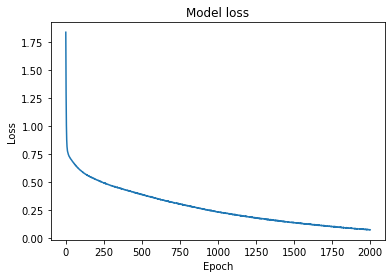

In [18]:
plot_history(history)

❓ **Question** ❓ What can you say about the new loss? 

❓ **Question** ❓ Evaluate once again your model on the test set and print the accuracy

In [19]:
results = model.evaluate(X_test, y_test)
print(results)

12/12 [==============================] - 0s 1ms/step - loss: 3.0973 - accuracy: 0.6056
[3.0972516536712646, 0.605555534362793]


❗ **Remark** ❗ On the one hand, the loss (computed on the train set) seems smaller than with 50 epochs. However, the accuracy on the test set got worse than before... 

❓ **Question** ❓ How is phenomenon called? 

overfitting!!

❗ **Remark** ❗ The overfitting occurs at some point during the iterations, once the accuracy starts getting worse on the test set. Therefore, there is a need to stop the model at some point : we will see how to do that tomorrow.

Nevertheless, we will see what happends in practice.

❓ **Question** ❓ Run the following command and plot the history

In [20]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=500, 
                    batch_size=16,
                    verbose=0)

In [21]:
history.history['val_loss']

[1.6176785230636597,
 1.3812530040740967,
 1.2073752880096436,
 1.084267258644104,
 1.0049406290054321,
 0.9535691738128662,
 0.9216852784156799,
 0.9015729427337646,
 0.8901512026786804,
 0.8815836310386658,
 0.8738539814949036,
 0.8734647035598755,
 0.8695823550224304,
 0.8689988255500793,
 0.8691822290420532,
 0.866818904876709,
 0.8688350319862366,
 0.8677695989608765,
 0.8686009645462036,
 0.8675435185432434,
 0.8703860640525818,
 0.8698829412460327,
 0.869741678237915,
 0.8720887899398804,
 0.8738869428634644,
 0.8733174800872803,
 0.8732918500900269,
 0.8717847466468811,
 0.8733095526695251,
 0.8738857507705688,
 0.8751735091209412,
 0.8743444085121155,
 0.8799879550933838,
 0.8788437843322754,
 0.8768535852432251,
 0.8815670609474182,
 0.8820075392723083,
 0.8789796829223633,
 0.880668580532074,
 0.8819735050201416,
 0.8829383254051208,
 0.8829947710037231,
 0.8831139206886292,
 0.8858696818351746,
 0.8860774636268616,
 0.8862537741661072,
 0.889725387096405,
 0.890349328517913

❓ **Question** ❓ Plot the values of the loss and accuracy on the train set (in blue) and on the test set (in orange). What can you comment on that?

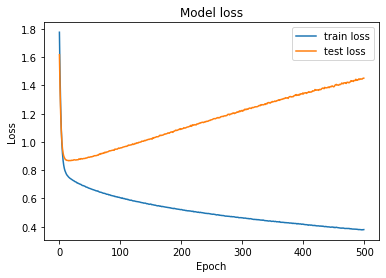

In [26]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

❓ **Question** ❓ Reproduce similar results by defining a new architecture that includes : 

- a first layer with 25 neurons 
- a second layer with 15 neurons
- a third layer with 10 neurons
- a final layer that outputs probability for each class



In [30]:
def initialize_model_2():
    
    model = models.Sequential()
    model.add(layers.Dense(25, input_dim = 8, activation='relu'))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(7, activation='softmax'))
    
    # Model optimization : Optimizer, loss and metric 
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model 


model = initialize_model_2()

❓ **Question** ❓ Fit this model with the previous data and look at the loss and accuracy through the iterations

Hint : select a high enough epoch number to see the overfitting happening.

In [31]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=500, 
                    batch_size=16,
                    verbose=0)

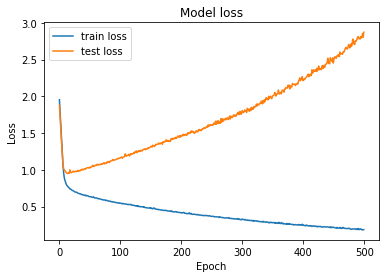

In [32]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

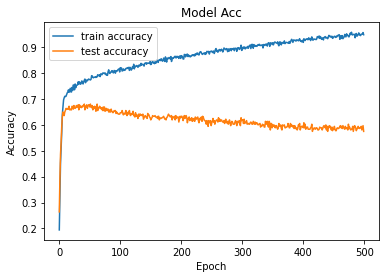

In [36]:

plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.title('Model Acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

❗ **Remark 1** ❗ We clearly see that an overfitting can happend during the training. Tomorrow, we will see how to preven the algorithm from overfitting. 

❗ **Remark 2** ❗ The model overfits as the number of parameters is very very large (compare the number of weights with a logistic regression on the same data)